In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
import scipy.optimize as so

**a)** Numerically solve system of two given ODEs using RK4. Plot with correct labels. Does steady state depend on initial conditions?

d[ATP]
dt = − [ATP] + a[F6P] + [ATP]**2
[F6P]

d[F6P]
dt = b − a[F6P] − [ATP]**2
[F6P]

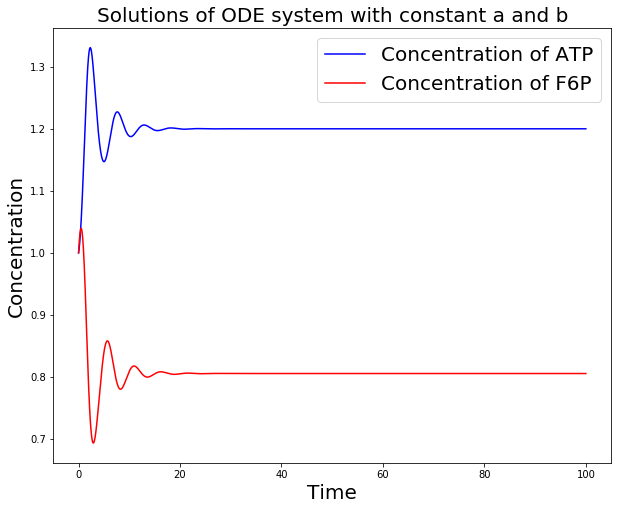

In [3]:
# Define the constants and the slope functions
a = 0.05
b=1.2

def f_ATP(t,c_ATP,c_F6P): return -c_ATP + a*c_F6P + c_ATP**2*c_F6P
def f_F6P(t,c_ATP,c_F6P): return b - a*c_F6P - c_ATP**2*c_F6P

# Define the time vector
h = 0.01
t = np.arange(0,100+h,h)

# Initialize vectors of solutions:
c_ATP = np.zeros(len(t))
c_F6P = np.zeros(len(t))

# Use initial conditions
c_ATP[0] = 1
c_F6P[0] = 1

# Solve using RK4 method
for i in range(len(t)-1): # Calculate next point, so don't go until last point
    # Slope k1 at left point
    kATP1 = f_ATP(t[i],c_ATP[i],c_F6P[i])
    kF6P1 = f_F6P(t[i],c_ATP[i],c_F6P[i])
    
    # Slope k2 at midpoint using k1
    kATP2 = f_ATP(t[i]+h/2, c_ATP[i]+h/2*kATP1, c_F6P[i]+h/2*kF6P1)
    kF6P2 = f_F6P(t[i]+h/2, c_ATP[i]+h/2*kATP1, c_F6P[i]+h/2*kF6P1)
    
    # Slope k3 at midpoint using k2
    kATP3 = f_ATP(t[i]+h/2, c_ATP[i]+h/2*kATP2, c_F6P[i]+h/2*kF6P2)
    kF6P3 = f_F6P(t[i]+h/2, c_ATP[i]+h/2*kATP2, c_F6P[i]+h/2*kF6P2)
    
    # Slope k4 at endpoint using k3
    kATP4 = f_ATP(t[i]+h, c_ATP[i]+h*kATP3, c_F6P[i]+h*kF6P3)
    kF6P4 = f_F6P(t[i]+h, c_ATP[i]+h*kATP3, c_F6P[i]+h*kF6P3)
    
    # average slopes:
    kATP = (kATP1 + 2*kATP2 + 2*kATP3 + kATP4)/6
    kF6P = (kF6P1 + 2*kF6P2 + 2*kF6P3 + kF6P4)/6
    
    # Calculate next point
    c_ATP[i+1] = c_ATP[i] + kATP*h
    c_F6P[i+1] = c_F6P[i] + kF6P*h

# Plot the solution
plt.figure(figsize=(10,8))
plt.plot(t,c_ATP,'b-',label='Concentration of ATP')
plt.plot(t,c_F6P,'r-',label='Concentration of F6P')
plt.xlabel('Time',size ='20')
plt.ylabel('Concentration',size ='20')
plt.legend(prop={'size': 20})
plt.title('Solutions of ODE system with constant a and b',size ='20')
plt.savefig('A')
plt.show()

**b** Experiments often observe the so-called ‘glycolytic oscillator’ where the concentrations oscillate for several minutes. Use the same initial conditions as part (a) with constant a = 0.05 However, b = 1.2 in the beginning like before but changes to b = 0.8 at t = 30 . Solve and plot the concentrations up to t = 100.

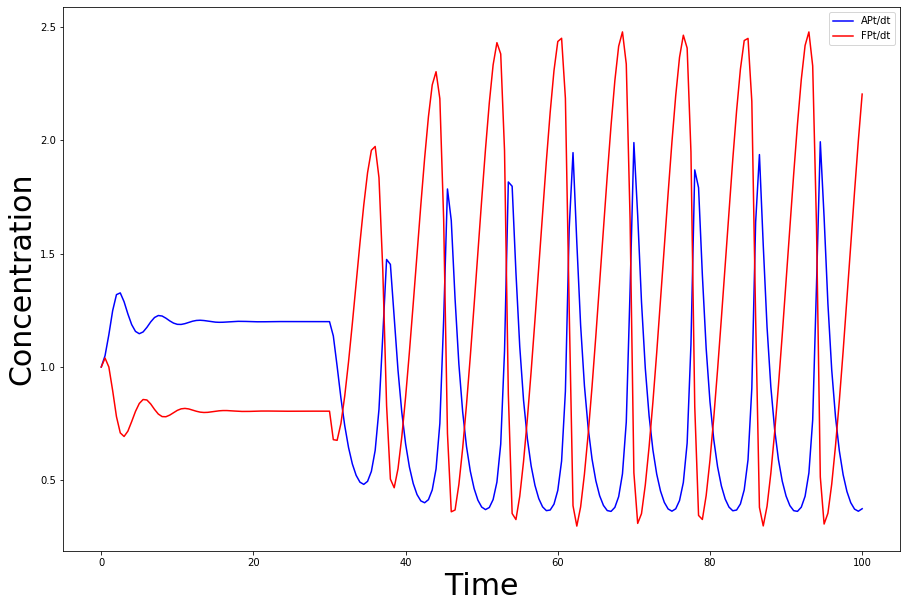

In [4]:
# Define the constants and the slope functions
a = 0.05
b = 1.2

def APt(x,y,t): return -1*x + a*y + y*x**2
def FPt(x,y,t): return b -1*a*y - y*x**2

# Define the time steps and initialize
h = 0.5
t = np.arange(0,100+h,h)
x = np.zeros(t.shape)
y = np.zeros(t.shape)
x[0] = 1
y[0] = 1

#I'maa make a Runge-Kunta method 4 cause it's more accurate.
# I did and modified the code from the tutorial and got this.
for i in range(len(t)-1):
    if t[i] < 30:
        kx1 = APt(x[i], y[i], t[i])
        ky1 = FPt(x[i], y[i], t[i])
    
        kx2 = APt(x[i]+ h*kx1/2, y[i] + h*ky1/2,t[i]+h/2)
        ky2 = FPt(x[i]+ h*kx1/2, y[i] + h*ky1/2,t[i]+h/2)
    
        kx3 = APt(x[i]+ h*kx2/2, y[i] + h*ky2/2,t[i]+h/2)
        ky3 = FPt(x[i]+ h*kx2/2, y[i] + h*ky2/2,t[i]+h/2)
    
        kx4 = APt(x[i]+ h*kx3, y[i] + h*ky3,t[i]+h/2)
        ky4 = FPt(x[i]+ h*kx3, y[i] + h*ky3,t[i]+h/2)
    
        kx = (kx1 +2*kx2 + 2*kx3 +kx4)/6
        ky = (ky1 + 2*ky2 + 2*ky3 + ky4)/6
    
        x[i+1] = x[i] + h*kx
        y[i+1] = y[i] + h*ky
    if t[i] >= 30: # step function for b
        b=0.8
        kx1 = APt(x[i], y[i], t[i])
        ky1 = FPt(x[i], y[i], t[i])
    
        kx2 = APt(x[i]+ h*kx1/2, y[i] + h*ky1/2,t[i]+h/2)
        ky2 = FPt(x[i]+ h*kx1/2, y[i] + h*ky1/2,t[i]+h/2)
    
        kx3 = APt(x[i]+ h*kx2/2, y[i] + h*ky2/2,t[i]+h/2)
        ky3 = FPt(x[i]+ h*kx2/2, y[i] + h*ky2/2,t[i]+h/2)
    
        kx4 = APt(x[i]+ h*kx3, y[i] + h*ky3,t[i]+h/2)
        ky4 = FPt(x[i]+ h*kx3, y[i] + h*ky3,t[i]+h/2)
    
        kx = (kx1 +2*kx2 + 2*kx3 +kx4)/6
        ky = (ky1 + 2*ky2 + 2*ky3 + ky4)/6
    
        x[i+1] = x[i] + h*kx
        y[i+1] = y[i] + h*ky

# Plot the results
plt.figure(figsize=(15,10))   
plt.plot(t,x,'b-', label='APt/dt')
plt.plot(t,y,'r', label='FPt/dt')
plt.xlabel('Time',size ='30')
plt.ylabel('Concentration',size ='30')
plt.legend()
#plt.grid()
plt.show()

**c)** Adding one more ODE for b, solve the system now for 3 coupled equations. Plot up to t=200 with same a.

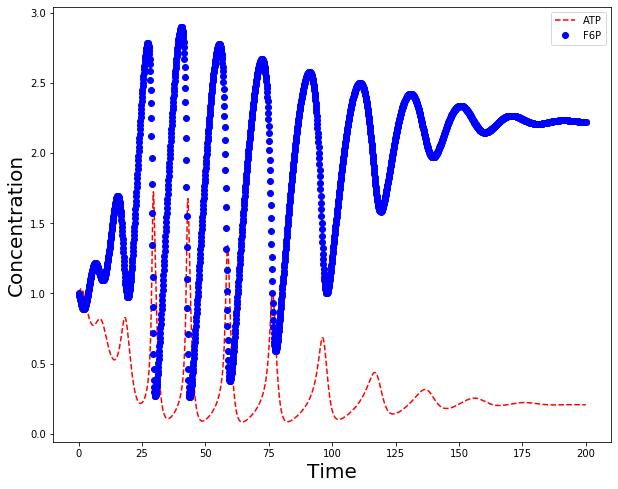

In [5]:
# Define the constants, time range and initial conditions
a = 0.05
h = 0.1
t = np.arange(0, 200 + h, h)
Y0 = [1, 1, 1]

# Define function for odeint
def Y(X, t): # b = X[0], ATP = x[1], F6P = X[2]
    b = -0.1*X[2]*X[1]*np.exp(-1/X[0])
    A = -X[1] + a*X[2] + X[2]*X[1]**2
    F = X[0] - a*X[2] - X[2]*X[1]**2
    return [b, A, F]

# Calculate solutions with inbuilt odeint
Y = si.odeint(Y, Y0, t)

# Plot results
plt.figure(figsize=(10,8))
plt.plot(t, Y[:, 1], 'r--', label = 'ATP')
plt.plot(t, Y[:, 2], 'bo', label = 'F6P')
plt.xlabel('Time',size ='20')
plt.ylabel('Concentration',size ='20')
plt.legend()
plt.show()